# 3.1 Estimation of the Population Mean

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import random
import pandas as pd
import pingouin as pg
from scipy.stats import norm, chi2


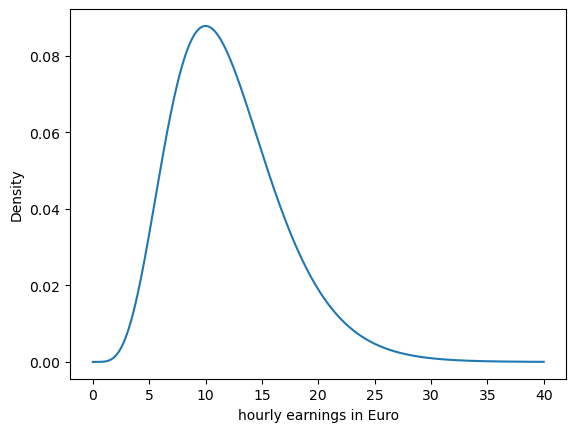

In [2]:
# plot the chi_12^2 distribution
x = np.arange(0, 40, 0.001)
plt.plot(x, chi2.pdf(x,df=12))
plt.ylabel('Density')
plt.xlabel("hourly earnings in Euro");


In [3]:
# set seed for reproducibility
np.random.seed(2)
# sample from the chi_12^2 distribution, use only the first observation
rsamp=np.random.chisquare(df=12, size=100)
rsamp[0]

9.462708066670281

# 3.2 Properties of the Sample Mean

In [6]:
# generate a fictious population
pop = np.random.normal( 10, 1,size=10000)

# sample from the population and estimate the mean
est1=np.zeros(25000)
est2=np.zeros(25000)
fo=np.zeros(25000)
for i in range(25000):
    est1[i]=np.mean(np.random.choice(list(pop), size=5))
    est2[i]=np.mean(np.random.choice(list(pop), size=25))
    fo[i]=np.random.choice(list(pop), size=5)[0]

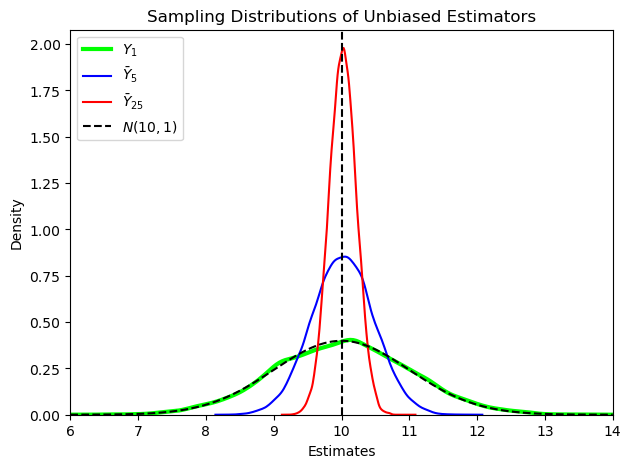

In [7]:
plt.figure(figsize=(7,5))

# plot density estimate Y_1
sns.kdeplot(fo,color='lime', linewidth=3, label=r'$Y_{1}$')

# add density estimate for the distribution of the sample mean with n=5 to the plot
sns.kdeplot(est1,color='blue', label=r'$\bar{Y}_{5}$')

# add density estimate for the distribution of the sample mean with n=25 to the plot
sns.kdeplot(est2,color='red', label=r'$\bar{Y}_{25}$')

# add a vertical line at the true parameter
plt.axvline(x=10, linestyle='--', color='black')

# add N(10,1) density to the plot
x = np.arange(6, 14, 0.001)
plt.plot(x, norm.pdf(x, loc=10),linestyle='--',color='black', label=r'$N(10,1)$')

#add a legend and other elements
plt.legend(loc=2)
plt.title("Sampling Distributions of Unbiased Estimators")
plt.xlabel('Estimates')
plt.ylabel('Density')
plt.xlim(6,14);

## $\bar{Y}$ is the Least Squares Estimator of $\mu_{Y}$

In [8]:
# define the function and vectorize it

def sqm(m):
    return sum((y-m)**2)
sqm=np.vectorize(sqm)

# draw random sample and compute the mean
y =np.random.normal(size=100, loc=10)
np.mean(y)


10.161686237278557

''

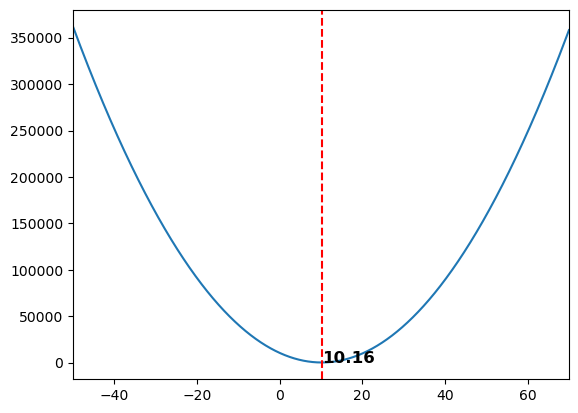

In [9]:
# plot the objective function
x = np.arange(-50, 70, 0.001)
plt.plot(x,sqm(x))
plt.xlim(-50,70)
# add vertical line at mean(y)
plt.axvline(np.mean(y), linestyle='--', color='red')
# add annotation at mean(y)
plt.text(x=np.mean(y),y=0, s=round(np.mean(y),2), fontsize='large',fontweight ='bold');

## Why Random Sampling is Important

In [10]:
# compute the population mean of pop
np.mean(pop)

10.018947611170276

In [15]:
# simulate outcomes for the sample mean when the i.i.d. assumption fails
est3=np.zeros(25000)
pop.sort()

probabilities=np.concatenate((np.repeat(4/17500,2500),np.repeat(1/17500,7500)))
for i in range(25000):
    est3[i]=np.mean(np.random.choice(pop,size=25, p=probabilities))

# compute the sample mean of the outcomes
np.mean(est3)

9.473431627930008

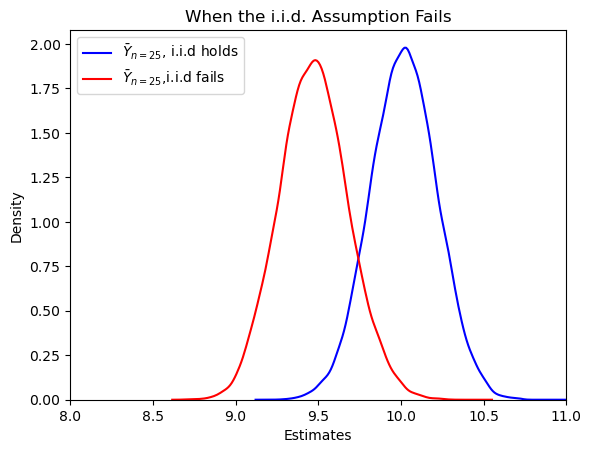

In [17]:
# sampling distribution of sample mean, i.i.d. holds, n=25
sns.kdeplot(est2,color='blue', label=r'$\bar{Y}_{n=25}$, i.i.d holds')

# sampling distribution of sample mean, i.i.d. fails, n=25
sns.kdeplot(est3,color='red', label=r'$\bar{Y}_{n=25}$,i.i.d fails')

# add a legend and other elements
plt.xlim(8,11)
plt.legend(loc=2)
plt.title("When the i.i.d. Assumption Fails")
plt.ylabel('Density')
plt.xlabel('Estimates');

# 3.3 Hypothesis Tests Concerning the Population Mean

## Calculating the p-Value when the Standard Deviation is Known

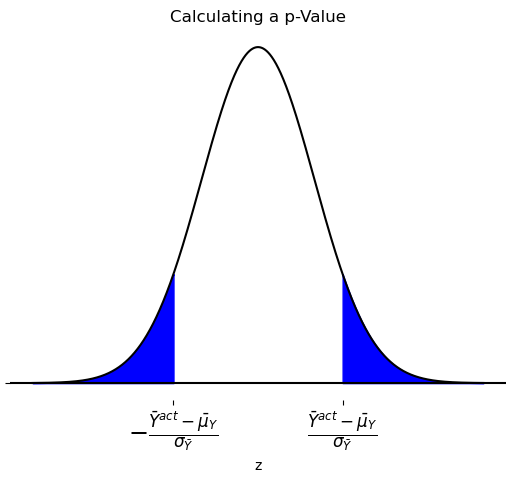

In [19]:
# plot the standard normal density on the interval [-4,4]
x=np.arange(-4,4,0.001)
plt.plot(x,norm.pdf(x), color='black')

# add x-axis
plt.axhline(0, color='black')

# shade p-value/2 region in left tail
plt.fill_between(x,norm.pdf(x),where=-1.5>x, color='blue')

# shade p-value/2 region in right tail
plt.fill_between(x,norm.pdf(x),where=1.5<x, color='blue')

#Add a title
plt.title("Calculating a p-Value")

# Add x-axis ticks
plt.xticks([-1.5,1.5],[r'$- \frac {\bar{Y}^{act}-\bar{\mu}_{Y}}{\sigma_{\bar{Y}}}$',
                       r'$ \frac {\bar{Y}^{act}-\bar{\mu}_{Y}}{\sigma_{\bar{Y}}}$'], fontsize='xx-large')
plt.xlabel('z')
plt.yticks([0],[""])
plt.box(False);

## Sample Variance, Sample Standard Deviation and Standard Error

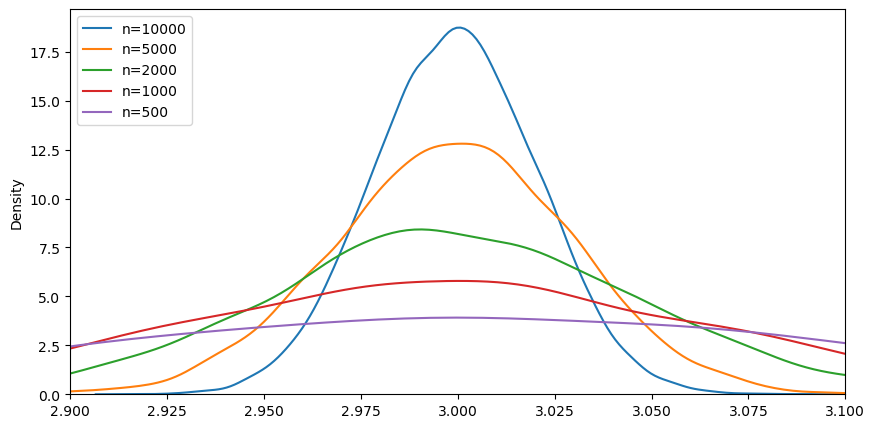

In [20]:
# vector of sample sizes
n = [10000, 5000, 2000, 1000, 500]

#create empty dictionary to store vectors
sd={}

for i in range(5):
    sd[i]=np.zeros(n[i])
# sample observations, estimate using 'np.std()' and plot the estimated distributions
for i in range(10000):
    sd[0][i]=np.std(np.random.normal(size=n[0], loc=10, scale=3))
    
for i in range(1,5):
    for j in range(n[i]):
        sd[i][j]=np.std(np.random.normal(size=n[i], loc=10, scale=3))

#plot
plt.figure(figsize=(10,5))
for i in range(5):
    sns.kdeplot(sd[i], label='n=%a'%n[i])
plt.xlim(2.9,3.1)
plt.legend(loc=2);


In [21]:
# draw 10000 samples of size 100 and estimate the mean of Y and
# estimate the standard error of the sample mean

mean_estimates = np.zeros(10000)
se_estimates = np.zeros(10000)

for i in range(10000):
    s=np.random.choice(a=[0,1],size=100,p=[0.9,0.1])
    mean_estimates[i]=np.mean(s)
    se_estimates[i] = np.sqrt(np.mean(s) * (1 - np.mean(s)) / 100)

In [22]:
np.mean(mean_estimates)


0.09978900000000002

In [23]:
np.mean(se_estimates)

0.02952884764914271

## Calculating the p-value When the Standard Deviation is Unknown

In [26]:
# sample and estimate, compute standard error
samplemean_act=np.mean(np.random.choice(a=[0,1],size=100,p=[0.9,0.1]))
SE_samplemean = np.sqrt(samplemean_act * (1 - samplemean_act) / 100)

# null hypothesis
mean_h0 = 0.1

# compute the p-value
pvalue = 2*norm.cdf(- abs(samplemean_act - mean_h0) / SE_samplemean)
pvalue

0.7267678061991002

## The t-statistic

In [28]:
# compute a t-statistic for the sample mean
tstatistic = (samplemean_act - mean_h0) / SE_samplemean
tstatistic

-0.3494282789073064

In [32]:
# prepare empty vector for t-statistics
tstatistics = np.zeros(10000)

# set sample size
n =300

# simulate 10000 t-statistics
for i in range(10000):
    s =np.random.choice(a=[0,1], 
              size = n,  
              p= [0.9, 0.1])
    tstatistics[i] = (np.mean(s)-0.1)/np.sqrt(np.var(s)/n)
  


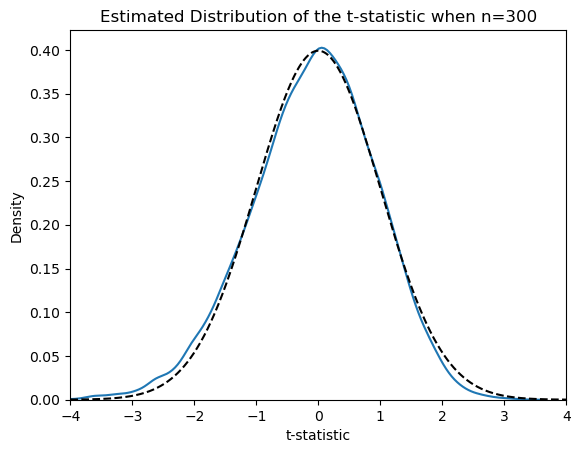

In [33]:
# plot density and compare to N(0,1) density
sns.kdeplot(tstatistics)

# N(0,1) density (dashed)
x=np.arange(-4,4,0.001)
plt.plot(x,norm.pdf(x),  '--',color='black')

#Plot elements
plt.xlim(-4,4)
plt.xlabel('t-statistic')
plt.ylabel('Density')
plt.title("Estimated Distribution of the t-statistic when n=300");

## Hypothesis Testing with a Prespecified Significance Level

In [34]:
# check whether p-value < 0.05
pvalue < 0.05

False

In [35]:
# check the critical value
norm.ppf( 0.975)

1.959963984540054

In [36]:
# check whether the null is rejected using the t-statistic computed further above
abs(tstatistic) > 1.96

False

## One-sided alternatives

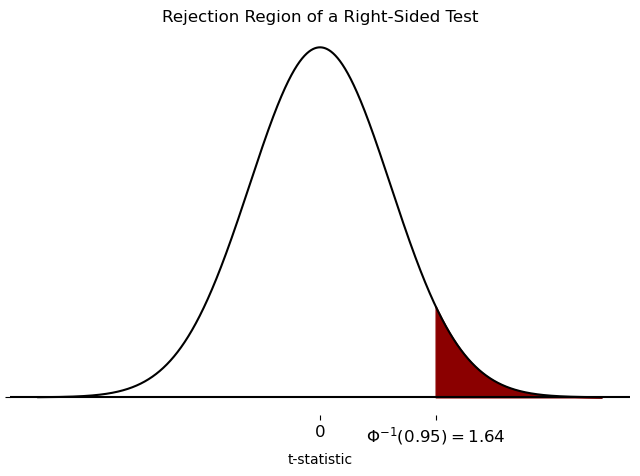

In [37]:
plt.figure(figsize=(8,5))
# plot the standard normal density on the domain [-4,4]
x=np.arange(-4,4,0.001)
plt.plot(x,norm.pdf(x), color='black')

# add the x-axis
plt.axhline(0, color='black')

# shade the rejection region in the right tail
plt.fill_between(x,norm.pdf(x),where=1.64<x, color='darkred')

#Plot options

plt.title("Rejection Region of a Right-Sided Test")
plt.xlabel("t-statistic")
plt.yticks([0],[""])
plt.xticks([0,1.64],[0,r'$ \Phi^{-1}(0.95)=1.64$'], fontsize='large')
plt.box(False);

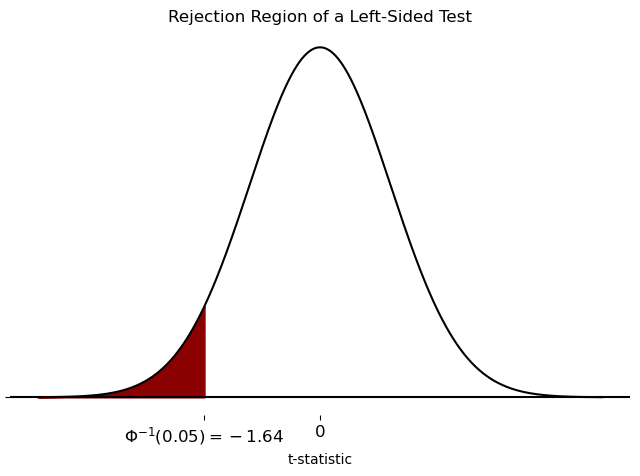

In [38]:
plt.figure(figsize=(8,5))
# plot the standard normal density on the domain [-4,4]
x=np.arange(-4,4,0.001)
plt.plot(x,norm.pdf(x), color='black')

# add the x-axis
plt.axhline(0, color='black')

# shade the rejection region in the right tail
plt.fill_between(x,norm.pdf(x),where=-1.64>x, color='darkred')

#Plot options

plt.title("Rejection Region of a Left-Sided Test")
plt.xlabel("t-statistic")
plt.yticks([0],[""])
plt.xticks([0,-1.64],[0,r'$ \Phi^{-1}(0.05)=-1.64$'], fontsize='large')
plt.box(False);

# 3.4 Confidence Intervals for the Population Mean

In [41]:
# set seed
np.random.seed(1)

# generate some sample data
sampledata = np.random.normal(10,10,size=100)

# check the type of the outcome produced by t.test
type(pg.ttest(sampledata,y=0))

pandas.core.frame.DataFrame

In [42]:
# display the elements produced by t.test
pg.ttest(sampledata,y=0).columns

Index(['T', 'dof', 'alternative', 'p-val', 'CI95%', 'cohen-d', 'BF10',
       'power'],
      dtype='object')

In [43]:
pg.ttest(sampledata,y=0)['CI95%']

T-test    [8.84, 12.37]
Name: CI95%, dtype: object

In [44]:
pg.ttest(sampledata,y=0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,11.921812,99,two-sided,7.540551e-21,"[8.84, 12.37]",1.192181,6.376e+17,1.0


# 3.5 Comparing Means from Different Populations

In [45]:
# set random seed
np.random.seed(1)

# draw data from two different populations with equal mean
sample_pop1 = np.random.normal(10, 10, size=100)
sample_pop2 = np.random.normal(10, 20, size=100)

# perform a two sample t-test
pg.ttest(sample_pop1, sample_pop2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.181394,198,two-sided,0.238863,"[-6.54, 1.64]",0.167074,0.295,0.217291


# 3.6 An Application to the Gender Gap of Earnings

In [46]:
cps=pd.read_excel('cps_ch3.xls')

In [47]:
# get an overview of the data structure
cps.head()

,a_sex,year,ahe08
0,1,1992,17.162025
1,1,1992,15.338560
2,1,1992,22.942291
3,2,1992,13.283340
4,1,1992,22.122923


In [48]:
# group data by gender and year and compute the mean, standard deviation
# and number of observations for each group
avgs=cps.groupby(by=['a_sex','year']).agg(['mean', 'std', 'count'])

# print the results to the console
avgs

ahe08                 
                 mean        std count
a_sex year                            
1     1992  23.273821  10.172081  1594
      1996  22.475436  10.103141  1379
      2000  24.883138  11.599727  1303
      2004  25.121687  12.008435  1894
      2008  24.978404  11.778632  1838
2     1992  20.046292   7.868418  1368
      1996  18.980475   7.951608  1230
      2000  20.739383   9.359327  1181
      2004  21.023729   9.363071  1735
      2008  20.874779   9.657140  1871

In [33]:
avgs.loc[2]

ahe08                
           mean       std count
year                           
1992  20.046292  7.868418  1368
1996  18.980475  7.951608  1230
2000  20.739383  9.359327  1181
2004  21.023729  9.363071  1735
2008  20.874779  9.657140  1871

In [50]:
# split the dataset by gender
male=avgs.loc[1].reset_index().droplevel(level=0, axis=1)
female=avgs.loc[2].reset_index().droplevel(level=0, axis=1)
male.columns=[ "Year", "Y_bar_m", "s_m", "n_m"]
female.columns=[ "Year", "Y_bar_f", "s_f", "n_f"]

In [51]:
# estimate gender gaps, compute standard errors and confidence intervals for all dates
gap = male['Y_bar_m'] - female['Y_bar_f']

gap_se = np.sqrt(male['s_m']**2 / male['n_m'] + female['s_f']**2 / female['n_f'])

gap_ci_l = gap - 1.96 * gap_se

gap_ci_u = gap + 1.96 * gap_se




In [54]:
#Concate results in a dataframe
df=pd.concat([male,female.iloc[:,1:],  gap, gap_se, gap_ci_l, gap_ci_u], axis=1)
df.columns=df.columns[:7].to_list()+['gap', 'gap_se', 'gap_ci_l', 'gap_ci_u']
df

,Year,Y_bar_m,s_m,n_m,Y_bar_f,s_f,n_f,gap,gap_se,gap_ci_l,gap_ci_u
0,1992,23.273821,10.172081,1594,20.046292,7.868418,1368,3.227529,0.331919,2.576967,3.878090
1,1996,22.475436,10.103141,1379,18.980475,7.951608,1230,3.494960,0.354154,2.800819,4.189102
2,2000,24.883138,11.599727,1303,20.739383,9.359327,1181,4.143755,0.421232,3.318140,4.969370
3,2004,25.121687,12.008435,1894,21.023729,9.363071,1735,4.097958,0.355900,3.400394,4.795523
4,2008,24.978404,11.778632,1838,20.874779,9.657140,1871,4.103626,0.354016,3.409755,4.797497


# 3.7 Scatterplots, Sample Covariance and Sample Correlation

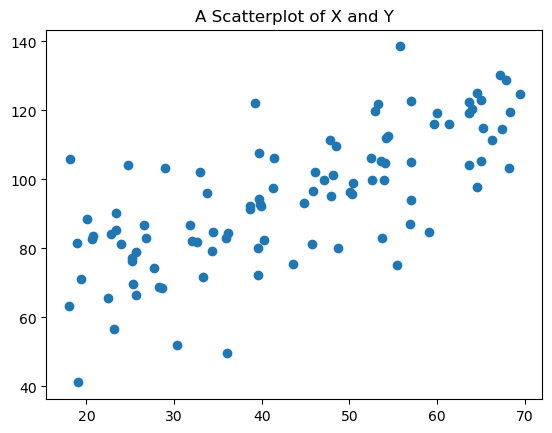

In [57]:
# set random seed
np.random.seed(1)

# generate dataset

x= np.random.uniform(18,70,100)
y=x+np.random.normal(50,15,100)

#plot
plt.scatter(x,y)
plt.title("A Scatterplot of X and Y");

## Sample Covariance and Correlation

In [58]:
# compute sample covariance of X and Y
np.cov(x,y)

array([[236.72912999, 215.21353098],
       [215.21353098, 377.41748046]])

In [59]:
# compute sample correlation between X and Y
np.corrcoef(x,y)

array([[1.        , 0.72000036],
       [0.72000036, 1.        ]])

In [60]:
# an equivalent way to compute the sample correlation
np.cov(x,y)/(np.std(x, ddof=1)*np.std(y, ddof=1))

array([[0.79198115, 0.72000036],
       [0.72000036, 1.26265631]])

In [61]:
# set random seed
np.random.seed(1)

# positive correlation (0.81)
example1=np.random.multivariate_normal(mean=[0,0],cov=[[2,2],[2,3]],size=100)

# negative correlation (-0.81)
example2=np.random.multivariate_normal(mean=[0,0],cov=[[2,-2],[-2,3]],size=100)

# no correlation 
example3=np.random.multivariate_normal(mean=[0,0],cov=[[1,0],[0,1]],size=100)

# no correlation (quadratic relationship)
x=np.arange(-3,3,0.01)
y=-x**2+np.random.normal(size=len(x))
example4=np.c_[x,y]

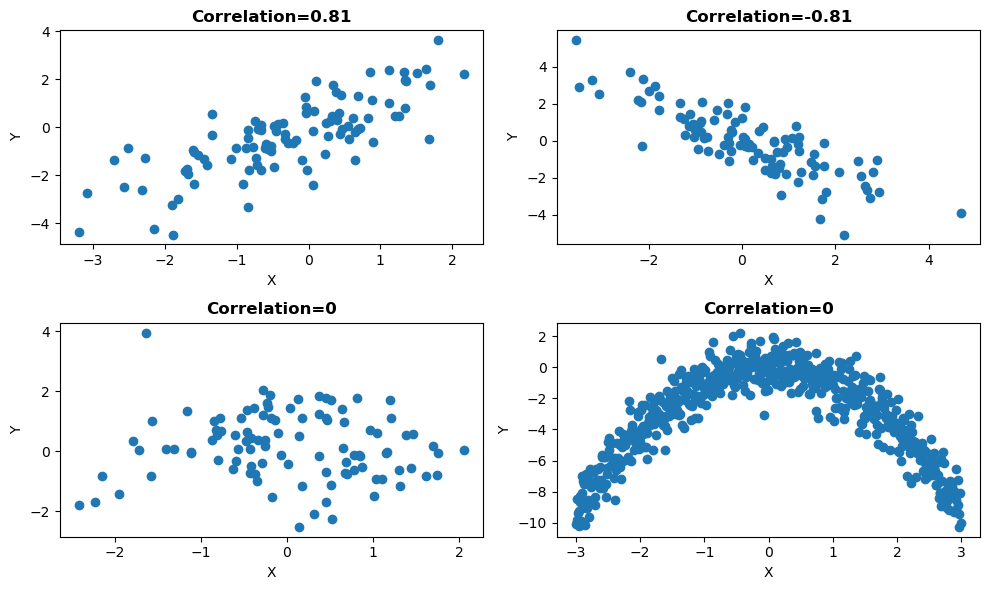

In [64]:
# divide plot area as 2-by-2 array
fig,axes=plt.subplots(2,2, figsize=(10,6))

# plot datasets
axes[0][0].scatter(example1[:,0],example1[:,1])
axes[0][0].set_title('Correlation=0.81',fontweight="bold")

axes[0][1].scatter(example2[:,0],example2[:,1])
axes[0][1].set_title('Correlation=-0.81',fontweight="bold")

axes[1][0].scatter(example3[:,0],example3[:,1])
axes[1][0].set_title('Correlation=0',fontweight="bold")

axes[1][1].scatter(example4[:,0],example4[:,1])
axes[1][1].set_title('Correlation=0',fontweight="bold")

#Label axis for all subplots
for i, ax in enumerate(axes.flat):
    ax.set(ylabel="Y", xlabel="X" )

#Adjust figure size
fig.tight_layout();